In [1]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load Data and Describe

In [2]:
# load the dataset
df = pd.read_csv('Clicked_Ads_Dataset.csv')
# show data samples
df.sample(5)

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category
994,994,43.70,28,441888720.0,173.01,Perempuan,4/4/2016 3:57,Yes,Tasikmalaya,Jawa Barat,Fashion
44,44,80.47,25,402637480.0,204.86,Perempuan,2/11/2016 13:26,No,Makassar,Sulawesi Selatan,Otomotif
902,902,45.62,43,375534670.0,121.28,Perempuan,6/26/2016 2:34,Yes,Tasikmalaya,Jawa Barat,Finance
966,966,37.58,52,361203290.0,176.70,Laki-Laki,4/13/2016 13:04,Yes,Surabaya,Jawa Timur,Travel
882,882,86.81,29,355745180.0,199.62,Laki-Laki,2/21/2016 16:57,No,Pontianak,Kalimantan Barat,Health


In [3]:
# check the data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1000 non-null   int64  
 1   Daily Time Spent on Site  987 non-null    float64
 2   Age                       1000 non-null   int64  
 3   Area Income               987 non-null    float64
 4   Daily Internet Usage      989 non-null    float64
 5   Male                      997 non-null    object 
 6   Timestamp                 1000 non-null   object 
 7   Clicked on Ad             1000 non-null   object 
 8   city                      1000 non-null   object 
 9   province                  1000 non-null   object 
 10  category                  1000 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 86.1+ KB


In [4]:
# Check unique values of each columns
df.nunique()

Unnamed: 0                  1000
Daily Time Spent on Site     890
Age                           43
Area Income                  987
Daily Internet Usage         955
Male                           2
Timestamp                    997
Clicked on Ad                  2
city                          30
province                      16
category                      10
dtype: int64

In [5]:
# Describe numerical features
df.describe()

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage
count,1000.000000,987.000000,1000.000000,9.870000e+02,989.000000
mean,499.500000,64.929524,36.009000,3.848647e+08,179.863620
std,288.819436,15.844699,8.785562,9.407999e+07,43.870142
min,0.000000,32.600000,19.000000,9.797550e+07,104.780000
25%,249.750000,51.270000,29.000000,3.286330e+08,138.710000
50%,499.500000,68.110000,35.000000,3.990683e+08,182.650000
75%,749.250000,78.460000,42.000000,4.583554e+08,218.790000
max,999.000000,91.430000,61.000000,5.563936e+08,267.010000


In [6]:
# Describe categorical features
cats_col = ['Male', 'city', 'province', 'category'] 
df[cats_col].describe()

,Male,city,province,category
count,997,1000,1000,1000
unique,2,30,16,10
top,Perempuan,Surabaya,Daerah Khusus Ibukota Jakarta,Otomotif
freq,518,64,253,112


In [7]:
# Check value counts of categorical features
for column in cats_col:
    print(df[column].value_counts())

Male
Perempuan    518
Laki-Laki    479
Name: count, dtype: int64
city
Surabaya             64
Bandung              64
Jakarta Timur        63
Jakarta Selatan      61
Jakarta Barat        57
Bekasi               56
Medan                48
Jakarta Utara        45
Palembang            42
Semarang             41
Batam                34
Makassar             33
Tangerang Selatan    33
Tangerang            32
Depok                30
Bandar Lampung       29
Bogor                28
Jakarta Pusat        27
Malang               26
Banjarmasin          23
Pakanbaru            23
Denpasar             21
Padang               19
Balikpapan           18
Cimahi               17
Samarinda            16
Tasikmalaya          15
Pontianak            12
Surakarta            12
Serang               11
Name: count, dtype: int64
province
Daerah Khusus Ibukota Jakarta    253
Jawa Barat                       210
Jawa Timur                        90
Banten                            76
Jawa Tengah                

### Overview: <br>

- The value 'yes' in the 'PernahBekerja' column appears to be an error. Assuming that '1' represents 'yes' and '0' represents 'no,' 'yes' will be replaced with '1'. However, since this column contains only one unique value, it will eventually be removed due to its lack of significance. <br>
- The 'Username', 'EnterpriseID', 'NomorHP' and 'Email' columns are deemed irrelevant for predicting employee retention and will therefore be deleted.

# Univariate Analysis

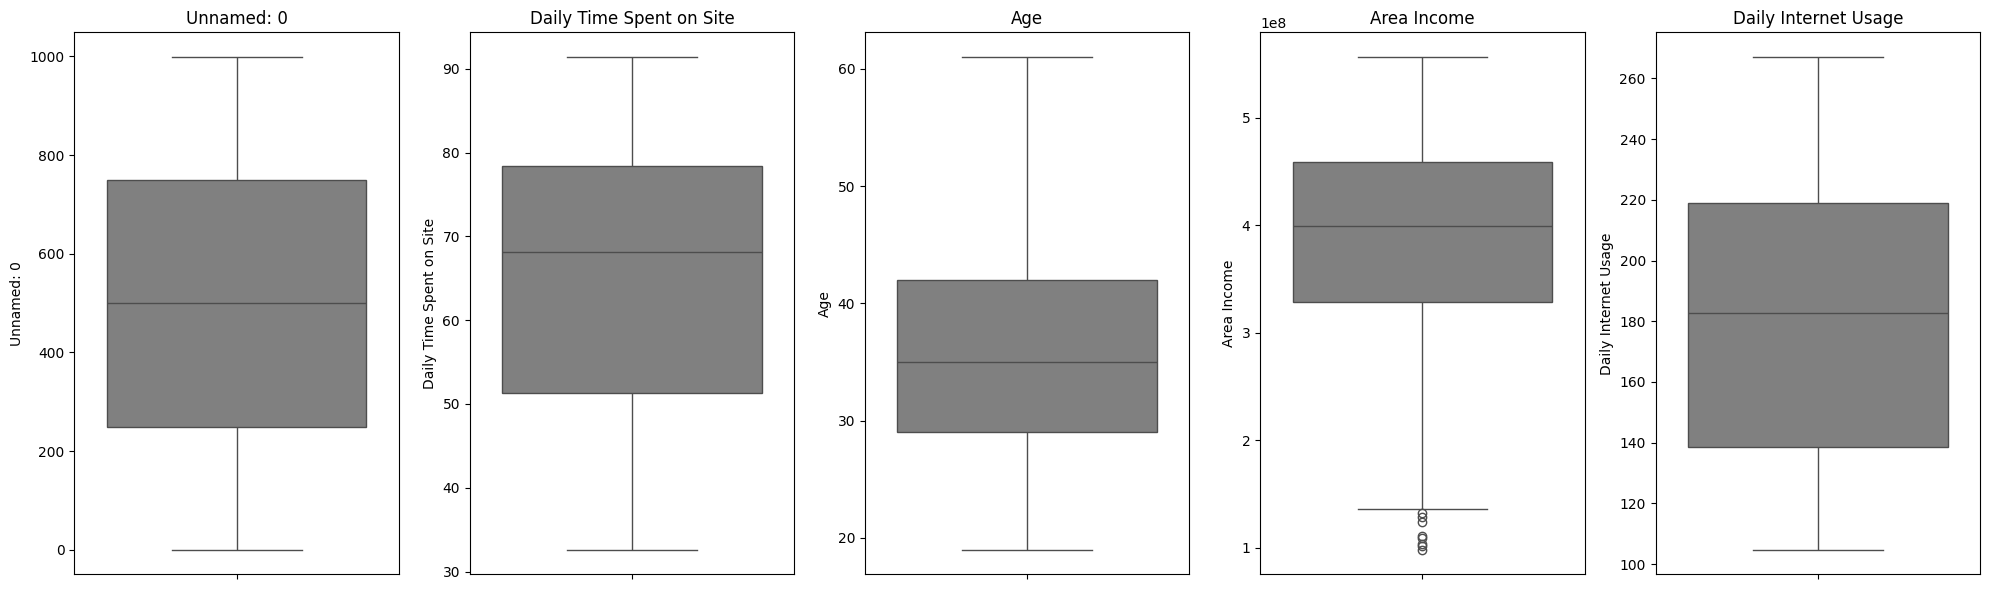

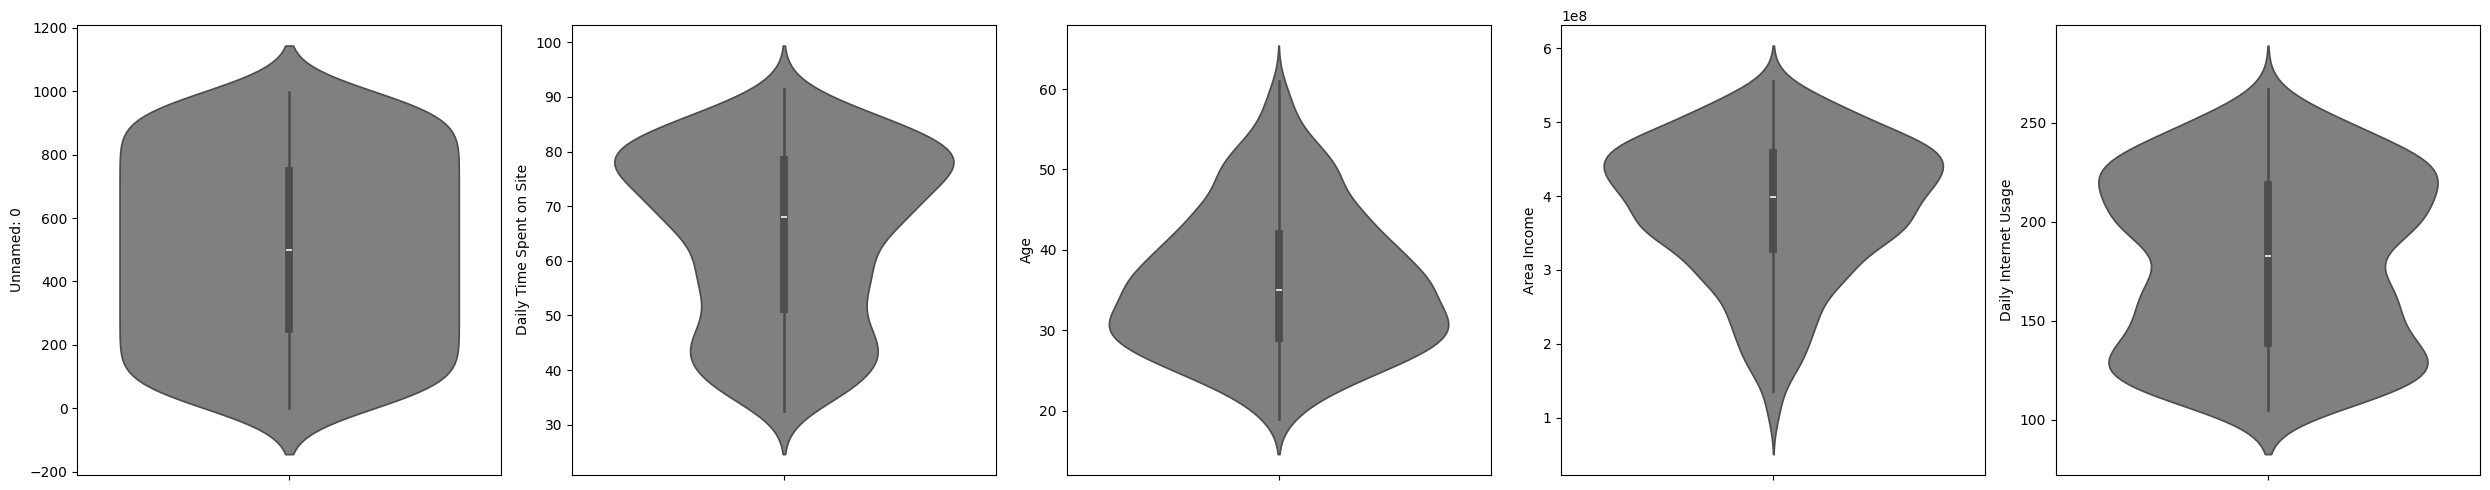

In [8]:
# Filter numerical columns only
nums= df.select_dtypes(include=['number']).columns
plt.figure(figsize=(20, 6))

for i, col in enumerate(nums):
    plt.subplot(1, len(nums), i + 1)
    sns.boxplot(y=df[col], color='grey', orient='v')
    plt.title(col)
    plt.tight_layout()
plt.show()

# Create violinplot to see outliers and distrubution
plt.figure(figsize=(25, 5))
for i in range (0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.violinplot(y=df[nums[i]], color='grey', orient='v')
    plt.tight_layout()
plt.show()

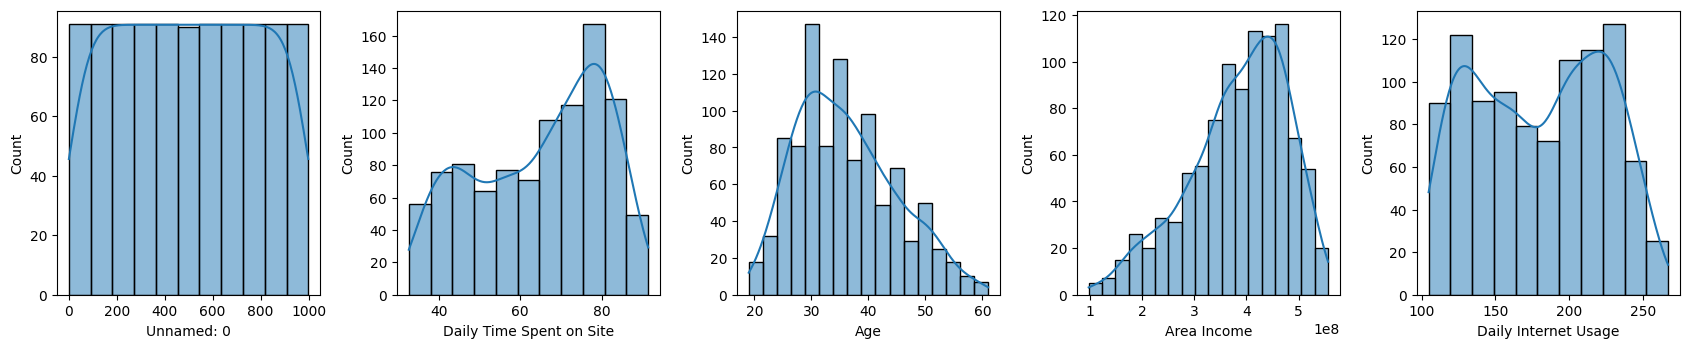

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(17, 10))
for i in range(0, len(nums)):
    plt.subplot(3, 5, i+1)
    sns.histplot(df, x=nums[i], kde=True, multiple='stack')
    plt.tight_layout()

plt.show()

Insights: <br>
Users spend an average of 65 minutes, ranging from 33 to 91 minutes, with moderate variability.<br>
Users spend an average of 180 minutes online, with most between 139 and 219 minutes. Maximum usage is 267 minutes.<br>
The average age is 36 years (range: 19-61 years), with most users between 29-42 years.<br>
The average income is 384 k (range: 97 k - 556 k), showing significant spread.<br>

# Bivariaye Analysis

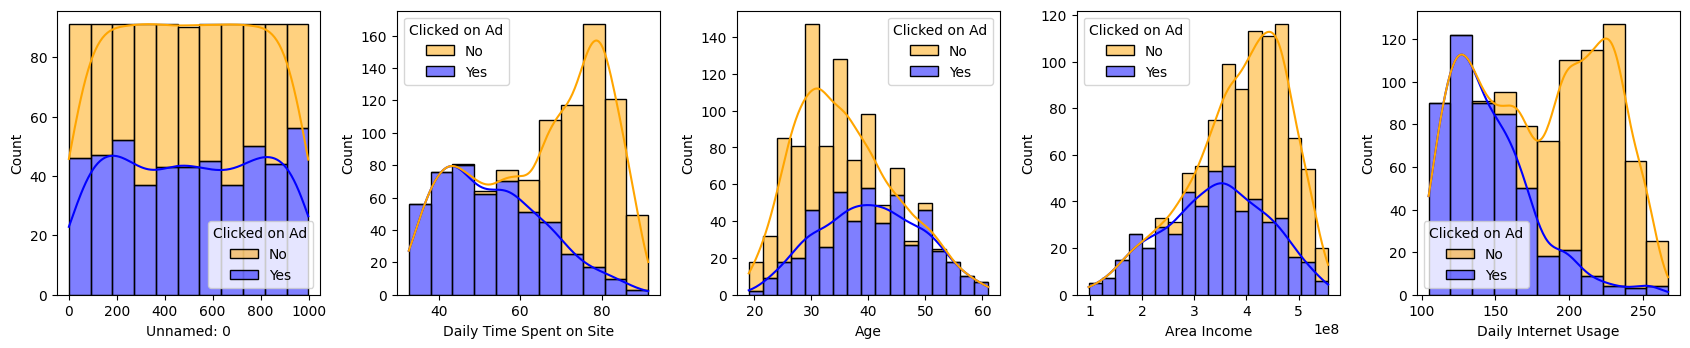

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(17, 10))
for i in range(0, len(nums)):
    plt.subplot(3, 5, i+1)
    sns.histplot(df, x=nums[i], hue='Clicked on Ad', kde=True, palette=['orange', 'blue'], multiple='stack')
    plt.tight_layout()

plt.show()

Insights:<br>
-  Non-clickers are older, have higher income, and spend more time online, while clickers are younger, have lower income, and spend less time online.

# Multivariate Analysis

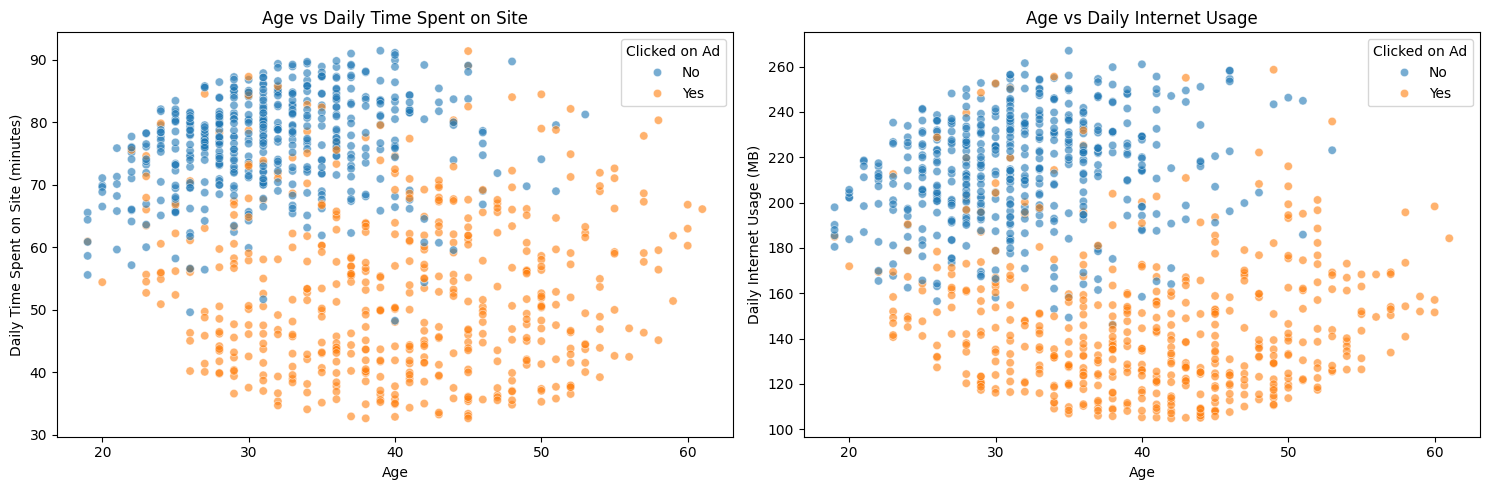

In [11]:
# Drop rows with NaN values in the relevant columns
df_clean = df[['Age', 'Daily Internet Usage', 'Daily Time Spent on Site', 'Clicked on Ad']].dropna()

# Scatter plot
plt.figure(figsize=(15, 5))

# Scatter plot between Age and Daily Time Spent on Site
plt.subplot(1, 2, 1)
sns.scatterplot(data=df_clean, x='Age', y='Daily Time Spent on Site', hue='Clicked on Ad', alpha=0.6)
plt.title('Age vs Daily Time Spent on Site')
plt.xlabel('Age')
plt.ylabel('Daily Time Spent on Site (minutes)')
plt.legend(title='Clicked on Ad')

# Scatter plot between Age and Daily Internet Usage
plt.subplot(1, 2, 2)
sns.scatterplot(data=df_clean, x='Age', y='Daily Internet Usage', hue='Clicked on Ad', alpha=0.6)
plt.title('Age vs Daily Internet Usage')
plt.xlabel('Age')
plt.ylabel('Daily Internet Usage (MB)')
plt.legend(title='Clicked on Ad')

plt.tight_layout()
plt.show()


insights:
-   The younger audience who clicks on ads shows less engagement in terms of time spent both online and on the site, potentially indicating a more goal-oriented browsing behavior when it comes to advertisements. <br>
-   The older audience who does not click on ads is spending more time online and on the site, which may imply a preference for organic content or skepticism toward advertisements.<br>

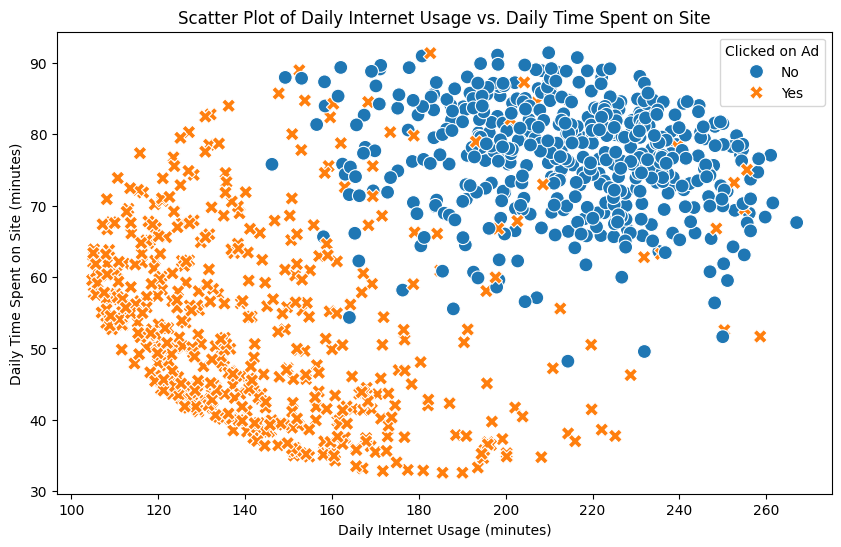

In [12]:
# Create scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Daily Internet Usage', y='Daily Time Spent on Site', hue='Clicked on Ad', style='Clicked on Ad', s=100)

# Add titles and labels
plt.title('Scatter Plot of Daily Internet Usage vs. Daily Time Spent on Site')
plt.xlabel('Daily Internet Usage (minutes)')
plt.ylabel('Daily Time Spent on Site (minutes)')
plt.legend(title='Clicked on Ad')
plt.grid(False)

# Show plot
plt.show()


Insights:<br>
-   Users who do not click on ads demonstrate a higher average Daily Internet Usage compared to clickers.<br>
-   Users who are more active online (spending more time on the internet) might be more inclined to explore various sites and content, leading to increased time spent on a single site when they find it engaging. <br>
-   For non-clickers, their engagement with content may lead to prolonged visits to the site, as they are likely exploring information rather than being directed by ads.

<Axes: >

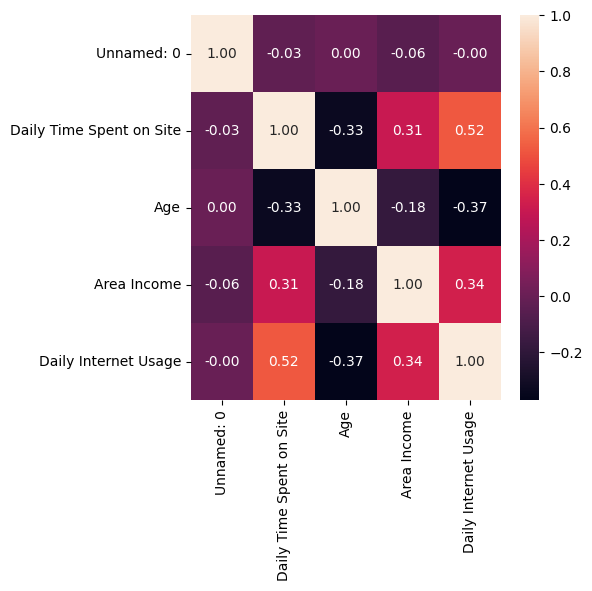

In [13]:
# Create heatmap to see corelation between numerical features
plt.figure(figsize=(5,5))
sns.heatmap(df[nums].corr(), annot=True, fmt='.2f')

Insights:<br>
1. **Daily Time Spent on Site & Daily Internet Usage (0.518)**
   - This indicates a moderate positive correlation, suggesting that as daily internet usage increases, time spent on the site also tends to increase.

2. **Daily Time Spent on Site & Age (-0.331)**
   - This indicates a moderate negative correlation, suggesting that older users tend to spend less time on the site.

3. **Daily Internet Usage & Age (-0.370)**
   - This also indicates a moderate negative correlation, suggesting that older users tend to use the internet less daily.

4. **Daily Internet Usage & Area Income (0.338)**
   - This indicates a moderate positive correlation, suggesting that users with higher area incomes tend to spend more time using the internet daily.

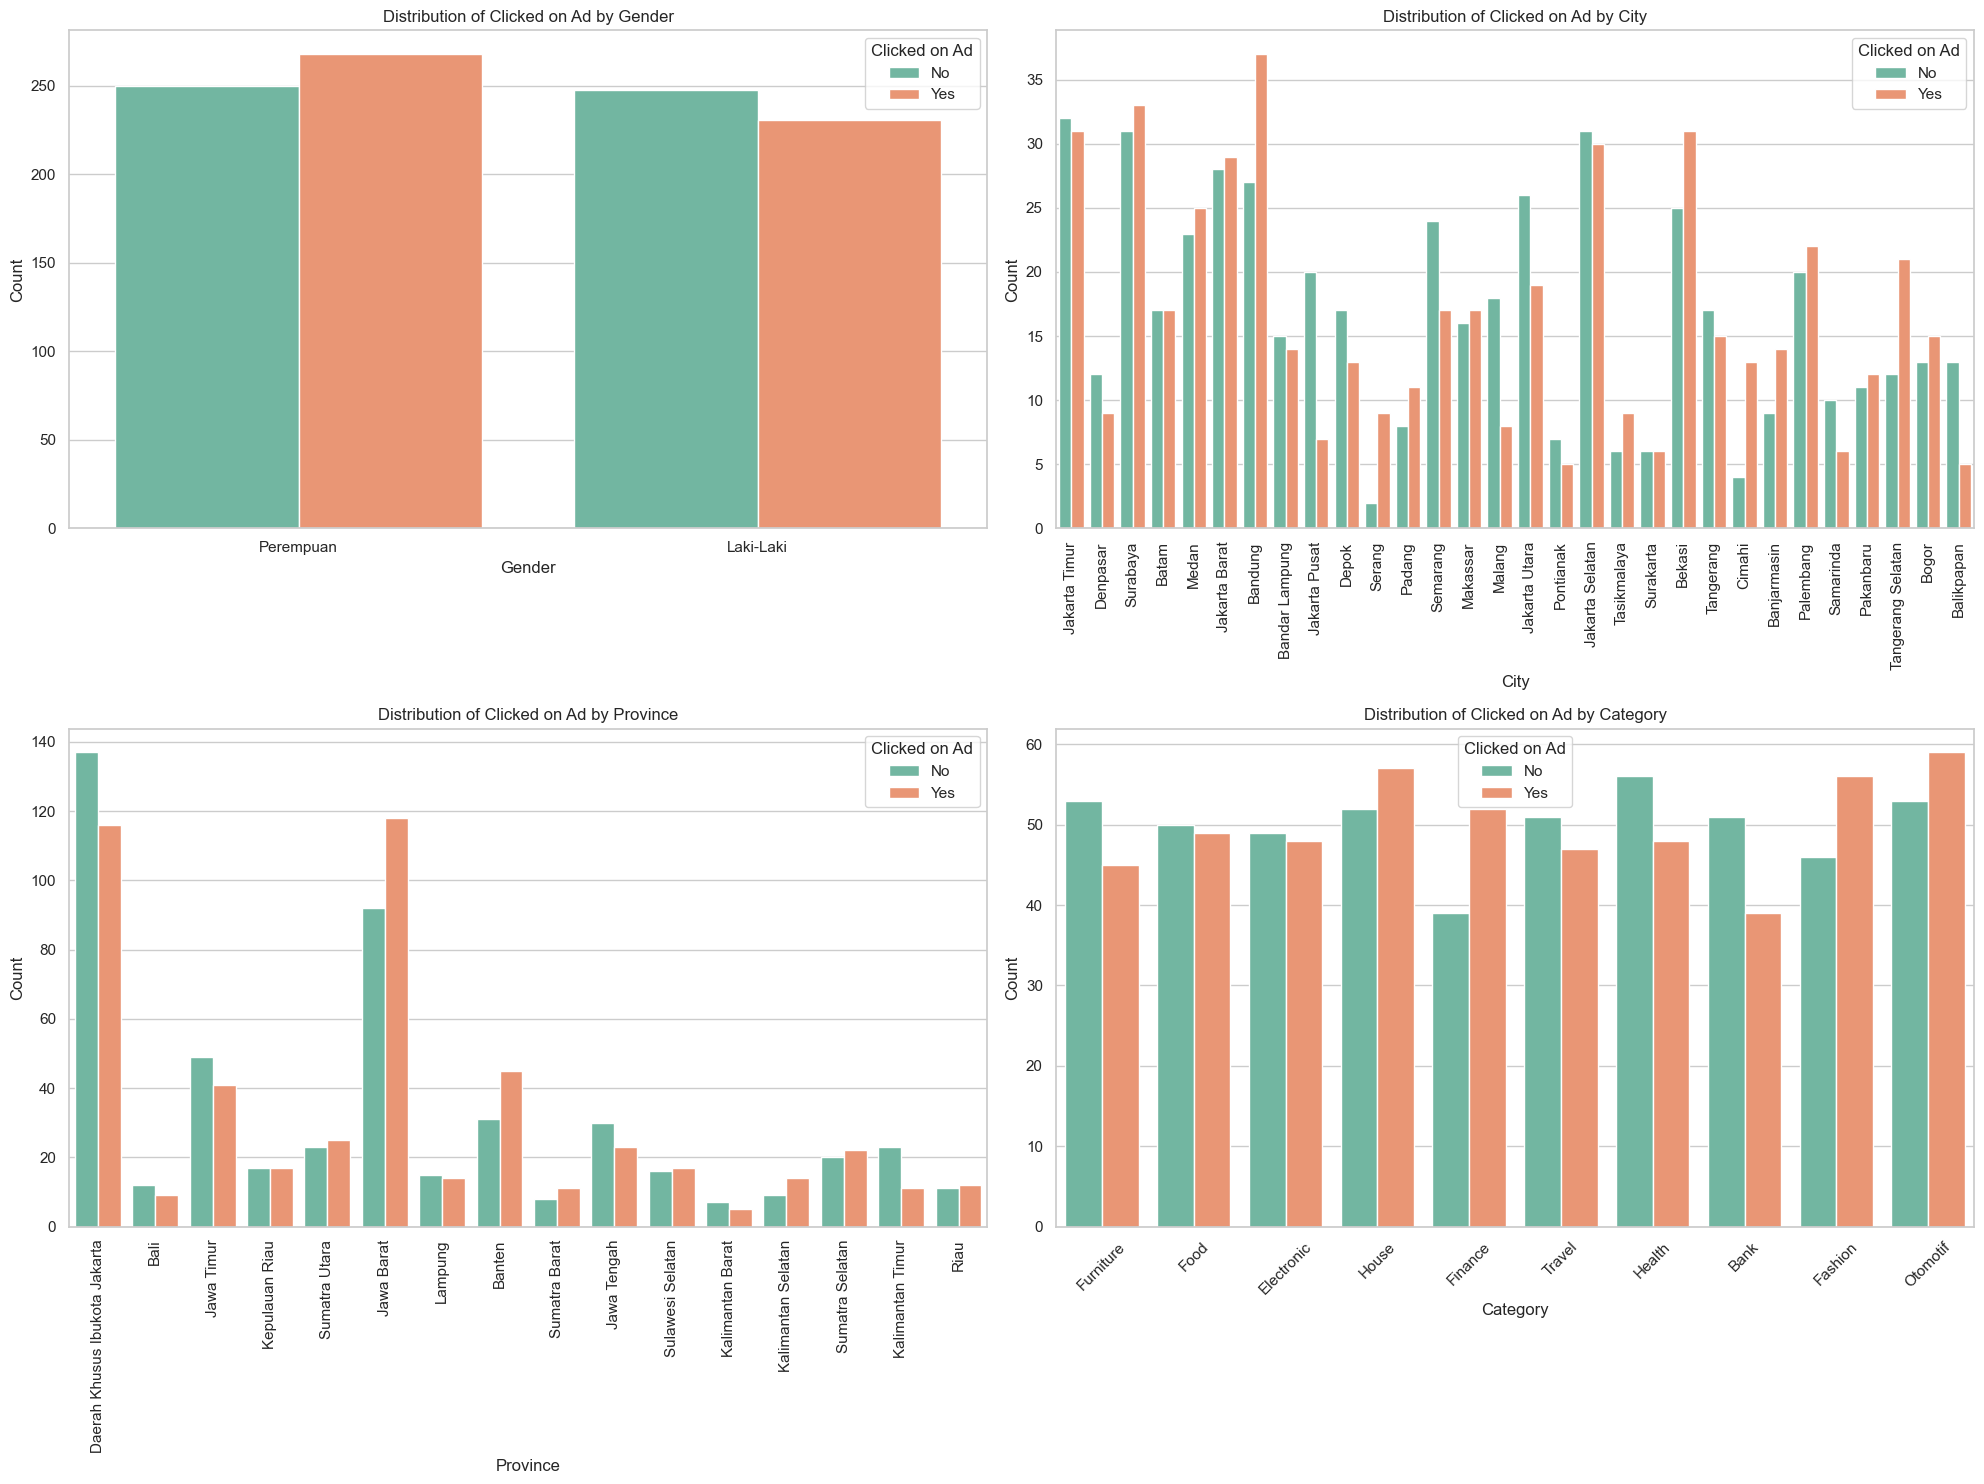

In [14]:

# Setting the style
sns.set(style="whitegrid")

# Create a figure with subplots
plt.figure(figsize=(20, 15))

# Distribution of 'Clicked on Ad' by 'Male'
plt.subplot(2, 2, 1)
sns.countplot(data=df, x='Male', hue='Clicked on Ad', palette='Set2')
plt.title('Distribution of Clicked on Ad by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Clicked on Ad')

# Distribution of 'Clicked on Ad' by 'City'
plt.subplot(2, 2, 2)
sns.countplot(data=df, x='city', hue='Clicked on Ad', palette='Set2')
plt.title('Distribution of Clicked on Ad by City')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Clicked on Ad')

# Distribution of 'Clicked on Ad' by 'Province'
plt.subplot(2, 2, 3)
sns.countplot(data=df, x='province', hue='Clicked on Ad', palette='Set2')
plt.title('Distribution of Clicked on Ad by Province')
plt.xlabel('Province')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Clicked on Ad')

# Distribution of 'Clicked on Ad' by 'Category'
plt.subplot(2, 2, 4)
sns.countplot(data=df, x='category', hue='Clicked on Ad', palette='Set2')
plt.title('Distribution of Clicked on Ad by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Clicked on Ad')

# Adjust layout
plt.tight_layout()
plt.show()


Insights: <br>
- Both genders exhibit a relatively similar number of clicks. The female audience shows a slightly higher tendency to click on ads compared to males.<br>
- Cities with the highest number of clicks generally include urban areas like Jakarta, Bandung and Surabaya.<br>
- The capital region, Jakarta, stands out with the highest engagement, followed by provinces like Banten and Jawa Barat, indicating a concentration of ad clicks in these areas.<br>
- Categories such as Otomotif and Fashion attract notable attention, with Otomotif showing the highest number of "Yes" responses, indicating strong interest in automotive-related ads.<br>

In [15]:

# Ensure the 'Timestamp' column is in datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Extracting month, day, and hour
df['Month'] = df['Timestamp'].dt.month  # Month as an integer (1-12)
df['Day'] = df['Timestamp'].dt.day      # Day of the month (1-31)
df['Time'] = df['Timestamp'].dt.hour    # Hour of the day (0-23)
df['Day_of_Week'] = df['Timestamp'].dt.day_name() # Day of the week (Monday-Sunday)
df['Week'] = (df['Timestamp'].dt.day - 1) // 7 + 1


# Display the updated DataFrame
print(df[['Timestamp', 'Month', 'Day', 'Time', 'Day_of_Week', 'Week']].sample(5))



              Timestamp  Month  Day  Time Day_of_Week  Week
368 2016-04-04 08:19:00      4    4     8      Monday     1
649 2016-01-06 21:43:00      1    6    21   Wednesday     1
329 2016-07-06 15:56:00      7    6    15   Wednesday     1
738 2016-03-17 22:24:00      3   17    22    Thursday     3
339 2016-07-16 14:13:00      7   16    14    Saturday     3


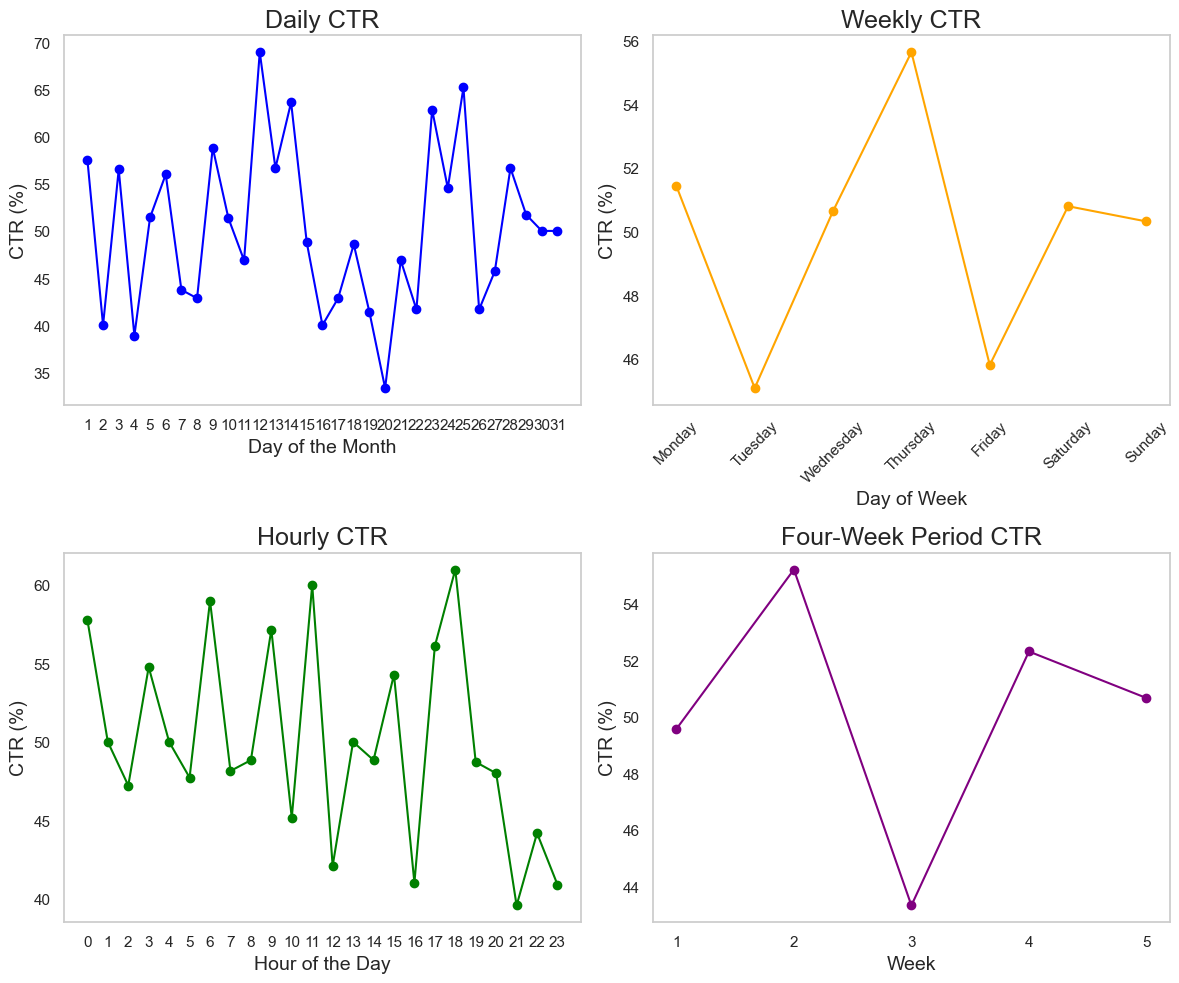

In [16]:
# Group by 'Day' to count total views and total clicks
total_views_and_clicks_daily = df.groupby('Day').agg(
    Total_Views=('Clicked on Ad', 'size'),
    Total_Clicks=('Clicked on Ad', lambda x: (x == 'Yes').sum())
).reset_index()

# Calculate CTR
total_views_and_clicks_daily['CTR (%)'] = (total_views_and_clicks_daily['Total_Clicks'] / total_views_and_clicks_daily['Total_Views']) * 100

# Group by 'Day_of_Week' to count total views and total clicks
total_views_and_clicks_weekly = df.groupby('Day_of_Week').agg(
    Total_Views=('Clicked on Ad', 'size'),
    Total_Clicks=('Clicked on Ad', lambda x: (x == 'Yes').sum())
).reset_index()

# Set the order for the Day of Week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
total_views_and_clicks_weekly['Day_of_Week'] = pd.Categorical(total_views_and_clicks_weekly['Day_of_Week'], categories=day_order, ordered=True)
total_views_and_clicks_weekly = total_views_and_clicks_weekly.sort_values('Day_of_Week')

# Calculate CTR
total_views_and_clicks_weekly['CTR (%)'] = (total_views_and_clicks_weekly['Total_Clicks'] / total_views_and_clicks_weekly['Total_Views']) * 100

# Group by 'Time' to count total views and total clicks
total_views_and_clicks_hourly = df.groupby('Time').agg(
    Total_Views=('Clicked on Ad', 'size'),
    Total_Clicks=('Clicked on Ad', lambda x: (x == 'Yes').sum())
).reset_index()
# Calculate CTR
total_views_and_clicks_hourly['CTR (%)'] = (total_views_and_clicks_hourly['Total_Clicks'] / total_views_and_clicks_hourly['Total_Views']) * 100

# Group by 'Week' to count total views and total clicks
total_views_and_clicks_week = df.groupby('Week').agg(
    Total_Views=('Clicked on Ad', 'size'),
    Total_Clicks=('Clicked on Ad', lambda x: (x == 'Yes').sum())
).reset_index()
# Calculate CTR
total_views_and_clicks_week['CTR (%)'] = (total_views_and_clicks_week['Total_Clicks'] / total_views_and_clicks_week['Total_Views']) * 100

# Set up the figure and subplots (2 rows, 2 columns)
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plotting the Daily Click-Through Rate (CTR)
axs[0, 0].plot(total_views_and_clicks_daily['Day'], total_views_and_clicks_daily['CTR (%)'], marker='o', color='blue')
axs[0, 0].set_title('Daily CTR', fontsize=18)
axs[0, 0].set_xlabel('Day of the Month', fontsize=14)
axs[0, 0].set_ylabel('CTR (%)', fontsize=14)
axs[0, 0].set_xticks(range(1, 32))  # Assuming max 31 days in a month
axs[0, 0].grid(False)

# Plotting the Day of Week Click-Through Rate (CTR)
axs[0, 1].plot(total_views_and_clicks_weekly['Day_of_Week'], total_views_and_clicks_weekly['CTR (%)'], marker='o', color='orange')
axs[0, 1].set_title('Weekly CTR', fontsize=18)
axs[0, 1].set_xlabel('Day of Week', fontsize=14)
axs[0, 1].set_ylabel('CTR (%)', fontsize=14)
axs[0, 1].set_xticks(range(len(total_views_and_clicks_weekly['Day_of_Week'])))
axs[0, 1].set_xticklabels(total_views_and_clicks_weekly['Day_of_Week'], rotation=45)
axs[0, 1].grid(False)

# Plotting the Hourly Click-Through Rate (CTR)
axs[1, 0].plot(total_views_and_clicks_hourly['Time'], total_views_and_clicks_hourly['CTR (%)'], marker='o', color='green')
axs[1, 0].set_title('Hourly CTR', fontsize=18)
axs[1, 0].set_xlabel('Hour of the Day', fontsize=14)
axs[1, 0].set_ylabel('CTR (%)', fontsize=14)
axs[1, 0].set_xticks(range(0, 24))  # Assuming 24 hours in a day
axs[1, 0].grid(False)

# Plotting the Week Click-Through Rate (CTR)
axs[1, 1].plot(total_views_and_clicks_week['Week'], total_views_and_clicks_week['CTR (%)'], marker='o', color='purple')
axs[1, 1].set_title('Four-Week Period CTR', fontsize=18)
axs[1, 1].set_xlabel('Week', fontsize=14)
axs[1, 1].set_ylabel('CTR (%)', fontsize=14)
axs[1, 1].set_xticks(total_views_and_clicks_week['Week'].unique())
axs[1, 1].grid(False)

# Adjust layout
plt.tight_layout()
plt.show()


Insights: <br>

-   Daily Performance:<br>
Highest CTR: Day 12 (68.97%) and Day 14 (63.64%).<br>
Lowest CTR: Day 20 (33.33%).<br>
Higher total clicks often correlate with higher CTR on certain days.<br>
<br>
- Weekly Performance:<br>
Best Day: Thursday (55.63% CTR).<br>
Lowest CTR: Friday (45.81%).<br>
Generally, the beginning and mid-week show better CTR.<br>
<br>
- Hourly Performance:<br>
Peak CTR: Hour 0 (57.78%) and Hour 18 (60.98%).<br>
Lowest CTR: Hour 21 (39.58%).<br>
Late-night and early evening hours yield higher engagement.<br>
<br>
- Performanace by 1-4 Week:<br>
Highest CTR Week: Week 2 (55.22%).<br>
Lowest CTR Week: Week 3 (43.32%).<br>
Fluctuations indicate varying effectiveness in ad campaigns week to week.<br>

In [17]:
# Display Daily Total Views and Clicks
print("Daily Total Views and Clicks")
print(total_views_and_clicks_daily[['Day', 'Total_Views', 'Total_Clicks', 'CTR (%)']])
# Display Weekly Total Views and Clicks
print("\nWeekly Total Views and Clicks")
print(total_views_and_clicks_weekly[['Day_of_Week', 'Total_Views', 'Total_Clicks', 'CTR (%)']])
# Display Hourly Total Views and Clicks
print("\nHourly Total Views and Clicks")
print(total_views_and_clicks_hourly[['Time', 'Total_Views', 'Total_Clicks', 'CTR (%)']])
# Display Total Views and Clicks by Week
print("\nTotal Views and Clicks by Week")
print(total_views_and_clicks_week[['Week', 'Total_Views', 'Total_Clicks', 'CTR (%)']])



Daily Total Views and Clicks
    Day  Total_Views  Total_Clicks    CTR (%)
0     1           33            19  57.575758
1     2           25            10  40.000000
2     3           46            26  56.521739
3     4           36            14  38.888889
4     5           35            18  51.428571
5     6           25            14  56.000000
6     7           32            14  43.750000
7     8           35            15  42.857143
8     9           34            20  58.823529
9    10           37            19  51.351351
10   11           32            15  46.875000
11   12           29            20  68.965517
12   13           30            17  56.666667
13   14           33            21  63.636364
14   15           41            20  48.780488
15   16           35            14  40.000000
16   17           42            18  42.857143
17   18           35            17  48.571429
18   19           29            12  41.379310
19   20           33            11  33.333333
20   

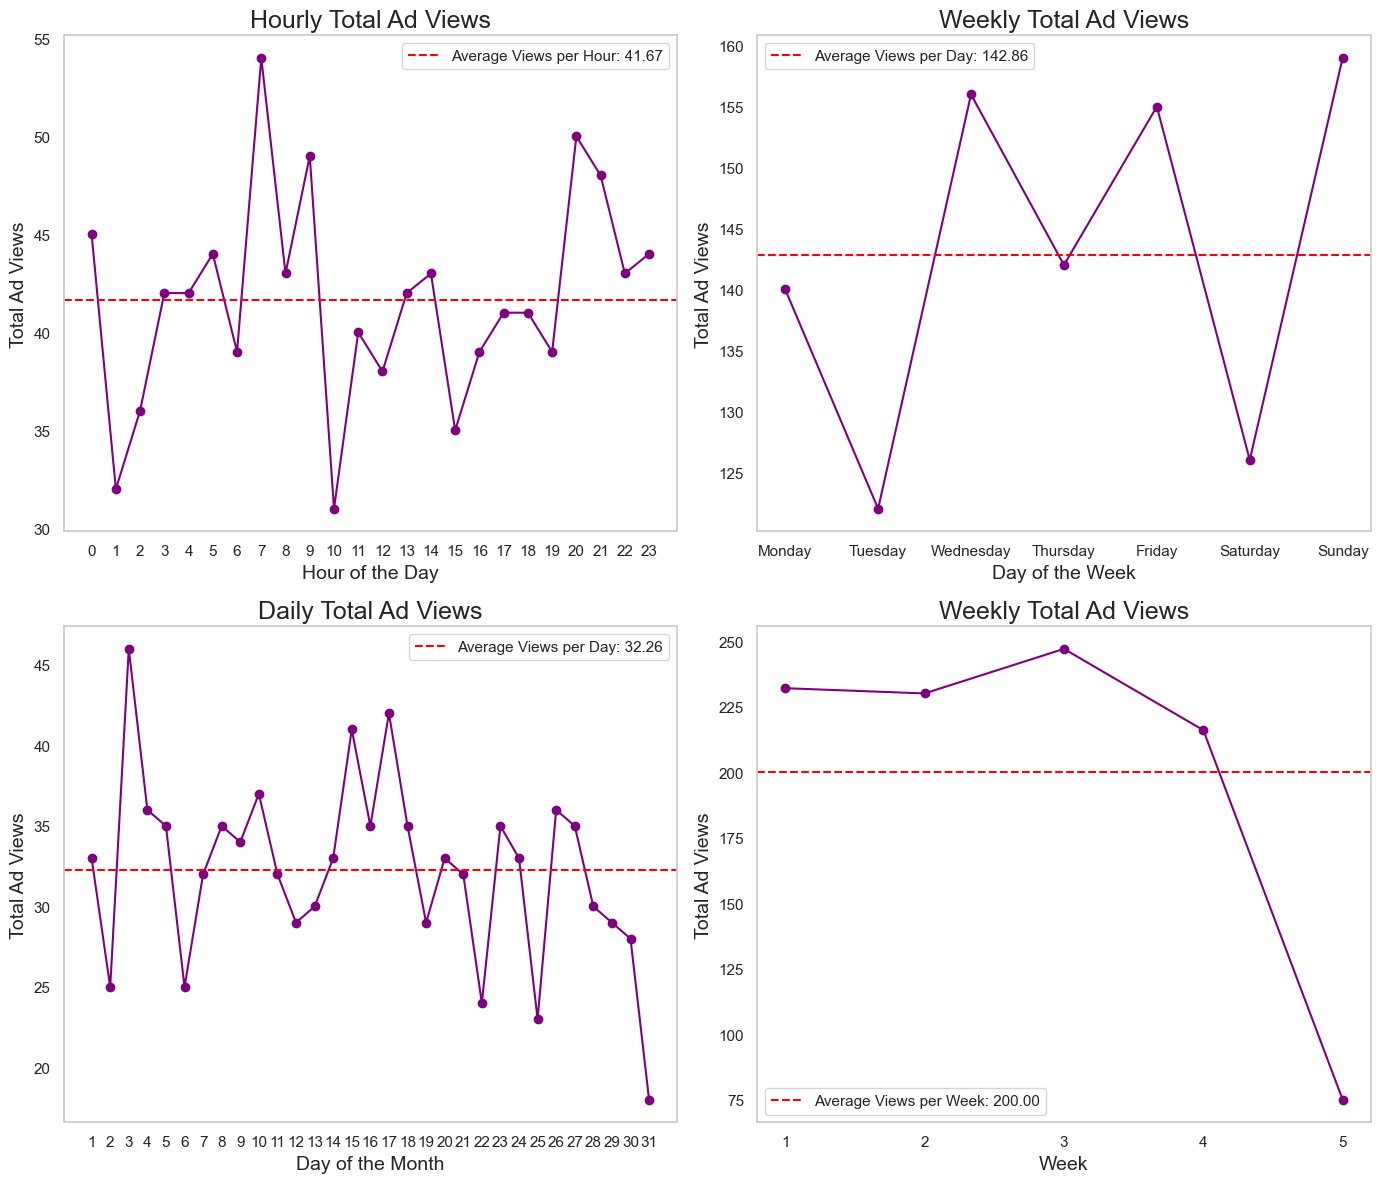

In [18]:

# Prepare the data for hourly views
total_views_per_hour = df.groupby('Time').size().reset_index(name='Total_Views')
average_views_per_hour = total_views_per_hour['Total_Views'].mean()

# Prepare the data for weekly views
total_views_per_day = df.groupby('Day_of_Week').size().reset_index(name='Total_Views')
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
total_views_per_day['Day_of_Week'] = pd.Categorical(total_views_per_day['Day_of_Week'], categories=day_order, ordered=True)
total_views_per_day = total_views_per_day.sort_values('Day_of_Week')
average_views_per_day = total_views_per_day['Total_Views'].mean()

# Prepare the data for daily views
total_views_per_month_day = df.groupby('Day').size().reset_index(name='Total_Views')
average_views_per_month_day = total_views_per_month_day['Total_Views'].mean()


# Prepare the data for week views
total_views_per_week = df.groupby('Week').size().reset_index(name='Total_Views')
average_views_per_week = total_views_per_week['Total_Views'].mean()
# Set up the figure and subplots (2 rows, 2 columns)
fig, axs = plt.subplots(2, 2, figsize=(14, 12))

# Plotting the total views per hour
axs[0, 0].plot(total_views_per_hour['Time'], total_views_per_hour['Total_Views'], marker='o', color='purple')
axs[0, 0].axhline(average_views_per_hour, color='red', linestyle='--', label=f'Average Views per Hour: {average_views_per_hour:.2f}')
axs[0, 0].set_title('Hourly Total Ad Views', fontsize=18)
axs[0, 0].set_xlabel('Hour of the Day', fontsize=14)
axs[0, 0].set_ylabel('Total Ad Views', fontsize=14)
axs[0, 0].set_xticks(range(0, 24))  # Assuming 24 hours in a day
axs[0, 0].grid(False)
axs[0, 0].legend()

# Plotting the total views per day of the week
axs[0, 1].plot(total_views_per_day['Day_of_Week'], total_views_per_day['Total_Views'], marker='o', color='purple')
axs[0, 1].axhline(average_views_per_day, color='red', linestyle='--', label=f'Average Views per Day: {average_views_per_day:.2f}')
axs[0, 1].set_title('Weekly Total Ad Views', fontsize=18)
axs[0, 1].set_xlabel('Day of the Week', fontsize=14)
axs[0, 1].set_ylabel('Total Ad Views', fontsize=14)
axs[0, 1].grid(False)
axs[0, 1].legend()

# Plotting the total views per day of the month
axs[1, 0].plot(total_views_per_month_day['Day'], total_views_per_month_day['Total_Views'], marker='o', color='purple')
axs[1, 0].axhline(average_views_per_month_day, color='red', linestyle='--', label=f'Average Views per Day: {average_views_per_month_day:.2f}')
axs[1, 0].set_title('Daily Total Ad Views', fontsize=18)
axs[1, 0].set_xlabel('Day of the Month', fontsize=14)
axs[1, 0].set_ylabel('Total Ad Views', fontsize=14)
axs[1, 0].set_xticks(range(1, 32))  # Assuming max 31 days in a month
axs[1, 0].grid(False)
axs[1, 0].legend()

# Plotting the total views per week
axs[1, 1].plot(total_views_per_week['Week'], total_views_per_week['Total_Views'], marker='o', color='purple')
axs[1, 1].axhline(average_views_per_week, color='red', linestyle='--', label=f'Average Views per Week: {average_views_per_week:.2f}')
axs[1, 1].set_title('Weekly Total Ad Views', fontsize=18)
axs[1, 1].set_xlabel('Week', fontsize=14)
axs[1, 1].set_ylabel('Total Ad Views', fontsize=14)
axs[1, 1].set_xticks(total_views_per_week['Week'].unique())
axs[1, 1].grid(False)
axs[1, 1].legend()

# Adjust layout
plt.tight_layout()
plt.show()



# Data Pre Processing

In [19]:
# Columns to check for outliers
cols = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage']

# Function to remove outliers using the IQR method
def remove_outliers_iqr(df):
    for column in cols:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df [(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Remove outliers
df_cleaned = remove_outliers_iqr(df)

# Display the number of rows removed
rows_removed = df.shape[0] - df_cleaned.shape[0]
print(f"\nNumber of rows removed: {rows_removed}")


Number of rows removed: 43


In [20]:
# Rename column 'Male' to 'Gender'
df_cleaned = df_cleaned.rename(columns={'Male': 'Gender'})

# Verify the column name change
df_cleaned.sample(3)

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Gender,Timestamp,Clicked on Ad,city,province,category,Month,Day,Time,Day_of_Week,Week
102,102,89.91,40,417154920.0,194.23,Perempuan,2016-07-09 14:55:00,No,Serang,Banten,Travel,7,9,14,Saturday,2
160,160,76.32,35,519163680.0,195.31,Laki-Laki,2016-06-23 00:16:00,No,Jakarta Selatan,Daerah Khusus Ibukota Jakarta,Food,6,23,0,Thursday,4
570,570,50.32,40,195752200.0,125.65,Perempuan,2016-04-27 18:25:00,Yes,Jakarta Barat,Daerah Khusus Ibukota Jakarta,Health,4,27,18,Wednesday,4


In [21]:
# Check duplicates
df_cleaned.duplicated().sum()

0

In [22]:
# Check null values
df_cleaned.isna().sum()

Unnamed: 0                  0
Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Gender                      2
Timestamp                   0
Clicked on Ad               0
city                        0
province                    0
category                    0
Month                       0
Day                         0
Time                        0
Day_of_Week                 0
Week                        0
dtype: int64

In [23]:
# Impute 'Gender' with mode
df_cleaned['Gender'].fillna(df_cleaned['Gender'].mode()[0], inplace=True)

# Verify the imputation
print(df_cleaned.isnull().sum())

Unnamed: 0                  0
Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Gender                      0
Timestamp                   0
Clicked on Ad               0
city                        0
province                    0
category                    0
Month                       0
Day                         0
Time                        0
Day_of_Week                 0
Week                        0
dtype: int64


In [24]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 957 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Unnamed: 0                957 non-null    int64         
 1   Daily Time Spent on Site  957 non-null    float64       
 2   Age                       957 non-null    int64         
 3   Area Income               957 non-null    float64       
 4   Daily Internet Usage      957 non-null    float64       
 5   Gender                    957 non-null    object        
 6   Timestamp                 957 non-null    datetime64[ns]
 7   Clicked on Ad             957 non-null    object        
 8   city                      957 non-null    object        
 9   province                  957 non-null    object        
 10  category                  957 non-null    object        
 11  Month                     957 non-null    int32         
 12  Day                       9

# Feature Engeneering

In [25]:
# Ensure the 'Timestamp' column is in datetime format
df_cleaned['Timestamp'] = pd.to_datetime(df_cleaned['Timestamp'])

# Extracting month, day, and hour
df_cleaned['Month'] = df_cleaned['Timestamp'].dt.month  # Month as an integer (1-12)
df_cleaned['Day'] = df_cleaned['Timestamp'].dt.day      # Day of the month (1-31)
df_cleaned['Time'] = df_cleaned['Timestamp'].dt.hour    # Hour of the day (0-23)
df_cleaned['Day_of_Week'] = df_cleaned['Timestamp'].dt.day_name() # Day of the week (Monday-Sunday)
df_cleaned['Week'] = (df_cleaned['Timestamp'].dt.day - 1) // 7 + 1


# Display the updated DataFrame
print(df_cleaned[['Timestamp', 'Month', 'Day', 'Time', 'Day_of_Week', 'Week']].sample(5))

              Timestamp  Month  Day  Time Day_of_Week  Week
870 2016-02-10 20:43:00      2   10    20   Wednesday     2
810 2016-03-05 20:53:00      3    5    20    Saturday     1
356 2016-04-10 03:30:00      4   10     3      Sunday     2
153 2016-02-12 22:51:00      2   12    22      Friday     2
890 2016-04-18 07:00:00      4   18     7      Monday     3


In [26]:
# Merge the daily CTR back to df_cleaned
df_cleaned = df_cleaned.merge(
    total_views_and_clicks_daily[['Day', 'CTR (%)']],
    on='Day',
    how='left'
).rename(columns={'CTR (%)': 'Daily_CTR'})

# Merge the day of the week CTR back to df_cleaned
df_cleaned = df_cleaned.merge(
    total_views_and_clicks_weekly[['Day_of_Week', 'CTR (%)']],
    on='Day_of_Week',
    how='left'
).rename(columns={'CTR (%)': 'Day_of_Week_CTR'})

# Merge the hourly CTR back to df_cleaned
df_cleaned = df_cleaned.merge(
    total_views_and_clicks_hourly[['Time', 'CTR (%)']],
    on='Time',
    how='left'
).rename(columns={'CTR (%)': 'Hourly_CTR'})

# Merge the weekly CTR back to df_cleaned
df_cleaned = df_cleaned.merge(
    total_views_and_clicks_week[['Week', 'CTR (%)']],
    on='Week',
    how='left'
).rename(columns={'CTR (%)': 'Weekly_CTR'})

Income bin low medium high

In [27]:
df_cleaned

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Gender,Timestamp,Clicked on Ad,city,province,category,Month,Day,Time,Day_of_Week,Week,Daily_CTR,Day_of_Week_CTR,Hourly_CTR,Weekly_CTR
0,0,68.95,35,432837300.0,256.09,Perempuan,2016-03-27 00:53:00,No,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture,3,27,0,Sunday,4,45.714286,50.314465,57.777778,52.314815
1,1,80.23,31,479092950.0,193.77,Laki-Laki,2016-04-04 01:39:00,No,Denpasar,Bali,Food,4,4,1,Monday,1,38.888889,51.428571,50.000000,49.568966
2,2,69.47,26,418501580.0,236.50,Perempuan,2016-03-13 20:35:00,No,Surabaya,Jawa Timur,Electronic,3,13,20,Sunday,2,56.666667,50.314465,48.000000,55.217391
3,3,74.15,29,383643260.0,245.89,Laki-Laki,2016-01-10 02:31:00,No,Batam,Kepulauan Riau,House,1,10,2,Sunday,2,51.351351,50.314465,47.222222,55.217391
4,4,68.37,35,517229930.0,225.58,Perempuan,2016-06-03 03:36:00,No,Medan,Sumatra Utara,Finance,6,3,3,Friday,1,56.521739,45.806452,54.761905,49.568966
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
952,994,43.70,28,441888720.0,173.01,Perempuan,2016-04-04 03:57:00,Yes,Tasikmalaya,Jawa Barat,Fashion,4,4,3,Monday,1,38.888889,51.428571,54.761905,49.568966
953,995,72.97,30,499691990.0,208.58,Laki-Laki,2016-02-11 21:49:00,Yes,Semarang,Jawa Tengah,Finance,2,11,21,Thursday,2,46.875000,55.633803,39.583333,55.217391
954,996,51.30,45,474475190.0,134.42,Laki-Laki,2016-04-22 02:07:00,Yes,Pakanbaru,Riau,Electronic,4,22,2,Friday,4,41.666667,45.806452,47.222222,52.314815
955,998,55.55,19,293445530.0,187.95,Perempuan,2016-03-24 02:35:00,No,Tangerang,Banten,Bank,3,24,2,Thursday,4,54.545455,55.633803,47.222222,52.314815


# Feature Encoding

In [41]:
# Convert 'Clicked on Ad' to boolean
df_cleaned['Clicked on Ad'] = df_cleaned['Clicked on Ad'].replace({'Yes': True, 'No': False})

# Optional: Verify the conversion
print(df_cleaned['Clicked on Ad'].sample(5))


536    False
918    False
716     True
452     True
880     True
Name: Clicked on Ad, dtype: bool


In [45]:
# Create a mapping for label encoding
day_of_week_mapping = {
    'Monday': 1,
    'Tuesday': 2,
    'Wednesday': 3,
    'Thursday': 4,
    'Friday': 5,
    'Saturday': 6,
    'Sunday': 7
}

# Apply the mapping to create a new column 'Day_of_Week_Encoded'
df_cleaned['Day_of_Week_Encoded'] = df_cleaned['Day_of_Week'].map(day_of_week_mapping)

# Display the updated DataFrame to check the encoding
print(df_cleaned[['Day_of_Week', 'Day_of_Week_Encoded']].head())


  Day_of_Week  Day_of_Week_Encoded
0      Sunday                    7
1      Monday                    1
2      Sunday                    7
3      Sunday                    7
4      Friday                    5


In [46]:
# One-hot encode categorical columns
df_cleaned = pd.get_dummies(df_cleaned, columns=['Gender', 'province', 'category'], prefix=['Gender', 'Province', 'Category'])

# Optional: View the one-hot encoded data
df_cleaned.head()

KeyError: "None of [Index(['Gender', 'province', 'category'], dtype='object')] are in the [columns]"

# Feature Selection

In [ ]:
from sklearn.feature_selection import f_classif

X_columns = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Day_of_Week_CTR', 'Daily_CTR', 'Hourly_CTR', 'Weekly_CTR']

X = df_cleaned[X_columns]
y = df_cleaned['Clicked on Ad']

# Compute ANOVA F-value and p-values
f_scores, p_values = f_classif(X, y)

# Create a DataFrame to display results
results = pd.DataFrame({'Feature': X_columns, 'F-Score': f_scores, 'P-Value': p_values})

# Sort the results by F-score in descending order
results_sorted_by_fscore = results.sort_values(by='F-Score', ascending=False)

# Print the sorted table
display(results_sorted_by_fscore)

,Feature,F-Score,P-Value
3,Daily Internet Usage,1663.534006,2.182170e-211
0,Daily Time Spent on Site,1198.454085,8.280834e-171
1,Age,302.424175,4.665344e-59
2,Area Income,269.466511,1.570043e-53
5,Daily_CTR,24.265723,9.886796e-07
6,Hourly_CTR,17.401085,3.302186e-05
7,Weekly_CTR,7.692225,5.653982e-03
4,Day_of_Week_CTR,4.568046,3.282715e-02


In [ ]:
from sklearn.feature_selection import chi2

# Define the feature 
X = df_cleaned[[
    'Gender_Laki-Laki', 
    'Gender_Perempuan', 
    'Province_Bali', 
    'Province_Banten', 
    'Province_Daerah Khusus Ibukota Jakarta',
    'Province_Jawa Barat', 
    'Province_Jawa Tengah', 
    'Province_Jawa Timur', 
    'Province_Kalimantan Barat', 
    'Province_Kalimantan Selatan', 
    'Province_Kalimantan Timur', 
    'Province_Kepulauan Riau', 
    'Province_Lampung', 
    'Province_Riau', 
    'Province_Sulawesi Selatan', 
    'Province_Sumatra Barat', 
    'Province_Sumatra Selatan', 
    'Province_Sumatra Utara', 
    'Category_Bank', 
    'Category_Electronic', 
    'Category_Fashion', 
    'Category_Finance', 
    'Category_Food', 
    'Category_Furniture', 
    'Category_Health', 
    'Category_House', 
    'Category_Otomotif', 
    'Category_Travel'
]]


# Define the target variable
y = df_cleaned['Clicked on Ad']

# Compute chi-squared statistics
chi2_stats, p_values = chi2(X, y)

# Create a DataFrame to display the results
results = pd.DataFrame({
    'Feature': X.columns,
    'Chi2 Statistic': chi2_stats,
    'P-value': p_values
})

# Sort the results by the Chi2 statistic
results_sorted = results.sort_values(by='Chi2 Statistic', ascending=False)

# Display the sorted results
display(results_sorted)

,Feature,Chi2 Statistic,P-value
10,Province_Kalimantan Timur,5.094085,0.024008
5,Province_Jawa Barat,2.418751,0.119890
3,Province_Banten,2.407530,0.120753
4,Province_Daerah Khusus Ibukota Jakarta,2.330275,0.126879
21,Category_Finance,2.308424,0.128674
18,Category_Bank,1.915458,0.166358
9,Province_Kalimantan Selatan,1.648929,0.199105
27,Category_Travel,1.336661,0.247624
0,Gender_Laki-Laki,1.115069,0.290983
1,Gender_Perempuan,1.010670,0.314742


# Data Split and Scaling

In [55]:
from sklearn.model_selection import train_test_split

# Assign features and target variable

# Define the feature set based on the specified columns
X = df_cleaned[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage']]

y = df_cleaned['Clicked on Ad']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
print(y.value_counts())

Clicked on Ad
False    479
True     478
Name: count, dtype: int64


In [56]:
# Scaling data with robust scaler
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# Display 
display(X_test[0], X_train[0])

array([-0.90676183, -0.15384615, -1.27739651, -0.50626944])

array([-0.27279202,  0.46153846,  1.13110268, -0.32089185])

# Modelling 1

# Modelling 2

In [57]:
from IPython.display import clear_output
import time 
from imblearn.under_sampling import RandomUnderSampler, TomekLinks, EditedNearestNeighbours
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.pipeline import Pipeline
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_validate
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from sklearn.metrics import accuracy_score,roc_auc_score,precision_score,recall_score,f1_score,log_loss
from sklearn.metrics import confusion_matrix, classification_report

In [58]:
#Initialize the classifier model
clf_1 = GaussianNB()
clf_2 = SVC(random_state=0)
clf_3 = RandomForestClassifier(random_state=0)
clf_4 = LogisticRegression()
clf_5 = DecisionTreeClassifier(random_state=0)
clf_6 = BaggingClassifier(random_state=0,base_estimator=clf_5)
clf_7 = GradientBoostingClassifier(random_state=0)
clf_8 = AdaBoostClassifier(random_state=0,base_estimator=clf_5)
clf_9 = KNeighborsClassifier()
clf_10 = MLPClassifier()
clf_11 = XGBClassifier(random_state=0)
clf_12 = LGBMClassifier(random_state=0)
clf_13 = CatBoostClassifier(random_state=0)

classifier_list = [clf_1,clf_2,clf_3,clf_4,clf_5,clf_6,clf_7,clf_8,clf_9,clf_10,clf_11,clf_12,clf_13]

In [59]:
# Melakukan Threholding Vanila Model


ml_model = []
score_accuracy = []
score_precision = []
score_recall = []
score_auc = []
time_training = []

for model in classifier_list:
    print(f"Processing {model.__class__.__name__}")
    
    start_time = time.time()
    tl = TomekLinks(sampling_strategy="auto")
    
    #Define pipeline
    pipeline=Pipeline(steps=[("r", tl), ("m", model)])
    
    #Define evaluation procedure (here we use Repeated Stratified K-Fold CV)
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    
    # Evaluate model
    scoring=["accuracy","precision_macro","recall_macro","roc_auc"]
    
    scores = cross_validate(pipeline, 
                            X_train, 
                            y_train, 
                            scoring = scoring, 
                            cv = cv, 
                            n_jobs = -1)
    
    ml_model.append(model.__class__.__name__)
    score_accuracy.append(np.mean(scores["test_accuracy"]))
    score_precision.append(np.mean(scores["test_precision_macro"]))
    score_recall.append(np.mean(scores["test_recall_macro"]))
    score_auc.append(np.mean(scores["test_roc_auc"]))
    end_time = time.time()
    time_training.append(time.strftime('%H:%M:%S', time.gmtime(end_time - start_time)))
    
# Hasil
clear_output()
df_model = pd.DataFrame({"ML_Model":ml_model,
                         "Accuracy": score_accuracy,
                         "Precision": score_precision,
                         "Recall": score_recall,
                         "AUC": score_auc,
                         "Training_Time": time_training})
df_model.sort_values(["AUC"],ascending=False)

,ML_Model,Accuracy,Precision,Recall,AUC,Training_Time
9,MLPClassifier,0.964624,0.965790,0.964513,0.989692,00:00:01
3,LogisticRegression,0.967609,0.969098,0.967454,0.989545,00:00:00
1,SVC,0.957651,0.959234,0.957472,0.988867,00:00:00
0,GaussianNB,0.961631,0.962704,0.961527,0.988741,00:00:00
10,XGBClassifier,0.951658,0.953071,0.951500,0.984566,00:00:00
12,CatBoostClassifier,0.953158,0.954416,0.953060,0.984035,00:00:11
2,RandomForestClassifier,0.954161,0.955573,0.953996,0.983938,00:00:01
11,LGBMClassifier,0.946698,0.948332,0.946524,0.982834,00:00:14
6,GradientBoostingClassifier,0.951168,0.952645,0.950995,0.982485,00:00:00
8,KNeighborsClassifier,0.962626,0.964379,0.962567,0.981062,00:00:00


# Modelling